<a href="https://colab.research.google.com/github/Akshaymahajan2111/Python/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X

array([8.23579767e-01, 3.30073484e-01, 3.64518769e-01, 6.00800696e-01,
       9.79813651e-01, 9.05084749e-01, 8.90167439e-01, 4.93025736e-01,
       7.53664000e-01, 6.28029311e-02, 6.61290168e-02, 1.71297938e-02,
       8.84267783e-01, 7.25872164e-02, 9.20935887e-01, 3.02916457e-02,
       4.26783663e-01, 6.33223667e-01, 1.21832148e-01, 2.75190100e-01,
       4.67035435e-01, 7.45148254e-01, 9.47438092e-01, 8.08907819e-01,
       8.61167575e-02, 8.37645329e-01, 9.55167759e-01, 1.20901365e-01,
       8.75851908e-01, 8.77211988e-01, 4.94039477e-01, 6.48385573e-01,
       7.37658765e-01, 4.50932391e-01, 8.11826829e-01, 6.73394984e-01,
       5.49412442e-01, 2.30672312e-01, 8.08290858e-01, 3.61388794e-01,
       6.98127300e-01, 5.82316496e-01, 8.47484308e-01, 7.97842485e-01,
       7.08440550e-02, 3.78186941e-02, 1.25379133e-01, 9.80371858e-01,
       6.81280513e-01, 5.39244067e-01, 5.92971981e-01, 9.66856486e-01,
       7.35350290e-01, 8.30232645e-01, 7.63748282e-01, 3.69724864e-01,
      

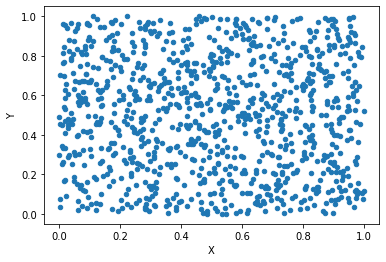

In [3]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)



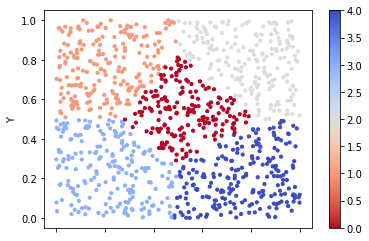

In [4]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm_r)

In [5]:
Univ = pd.read_csv("Universities_Clustering.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [6]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [7]:
df_norm = norm_func(Univ.iloc[:,1:])

In [8]:
df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


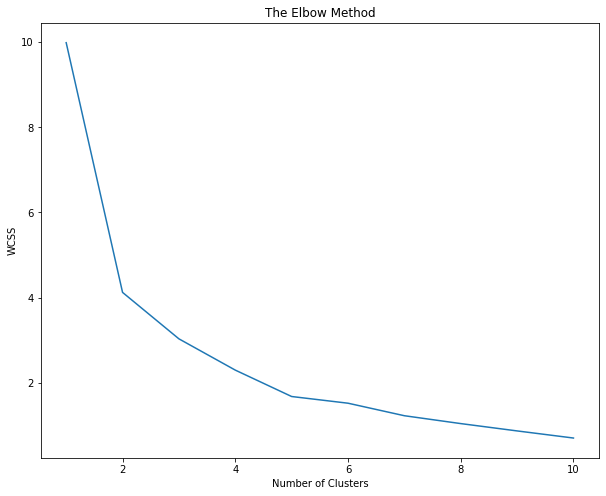

In [9]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [10]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [11]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([1, 3, 4, 1, 1, 2, 2, 1, 2, 3, 2, 1, 1, 0, 2, 0, 2, 0, 4, 1, 4, 1,
       1, 0, 2], dtype=int32)

In [12]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [13]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
1,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667
2,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
4,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333


Text(0.5, 1.0, 'Clusters using KMeans')

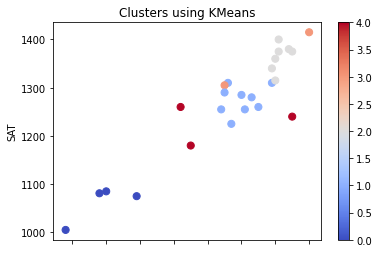

In [14]:
Univ.plot(x="Top10",y ="SAT",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [15]:
clf.inertia_

1.6781326840746353

In [16]:
WCSS 


[9.988235196638557,
 4.123452442397179,
 3.0325185782635184,
 2.298201209753558,
 1.6781326840746353,
 1.5208902467737897,
 1.2269240786989033,
 1.042159766389197,
 0.8699381439330709,
 0.7029178211184799]